# Лабораторная работа №3
## Раймунду Инасиу
## 20-ИВТ-3

# Задание: Occupancy

1.	Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).
2.	Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;
3.	Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)
4.	Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);
5.	Выполните замену категориальных признаков; выберите и обоснуйте способ замены;
6.	Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации);
7.	Заполните пропущенные значения в данных;
8.	Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку (изучите возможные для изменения параметры классификации). Определите схему построения многоклассового классификатора, используемую по умолчанию (опишите используемую схему кодирования, обоснуйте свой выбор). Постройте, если это возможно, многоклассовую классификацию на основе схем «один-против-всех» и «все-против-всех». Оцените точность классификации для каждой их схем. Постройте кривые PR и ROC (для каждого из классов должны быть построены отдельные кривые, а также кривые для микро и макроусреднения метрик качества). Для линейного классификатора используйте регуляризацию. 
9.	Сравните кривые для классификаторов, указанных в задании, сделайте выводы.



### 1.Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных

<b>Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных</b>

1. date time - <b>Дата-время (год - месяц - день - час : минута : секунда)</b> 
2. Temperature - <b>Температура (по Цельсию)</b>
3. Relative Humidity - <b>Относительная влажность (%)</b>
4. Light - <b>Свет (в люксах)</b>
5. CO2 - <b>Углекислый газ  (в ppm)</b>
6. Humidity Ratio - <b>Удельная влажность</b>
7. Occupancy - <b>Занятость (0 - незанятый статус, 1 - занятый статус)</b>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn as skl
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Perceptron
from sklearn.calibration import CalibratedClassifierCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_recall_curve, average_precision_score, roc_curve, auc
import warnings
warnings.simplefilter('ignore')
%matplotlib inline

oc = pd.read_csv('datatraining.txt')
occ = pd.DataFrame(oc)
occ.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


### 2.Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции

In [2]:
docc = occ.drop_duplicates()
docc.count()
print ('До удаления дубликатов:', occ.shape)
print ('После удаления дубликатов:', docc.shape)

До удаления дубликатов: (8143, 7)
После удаления дубликатов: (8143, 7)


### 3.Оцените сбалансированность данных по классам (постройте гистограмму)

<AxesSubplot:xlabel='Occupancy', ylabel='count'>

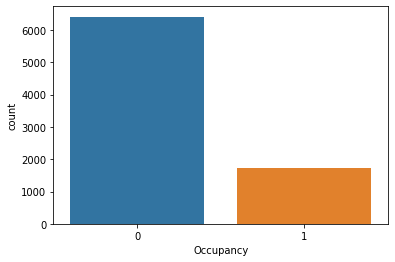

In [3]:
import seaborn as sns
sns.countplot(data=docc, x='Occupancy')

### 4.Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования

<AxesSubplot:>

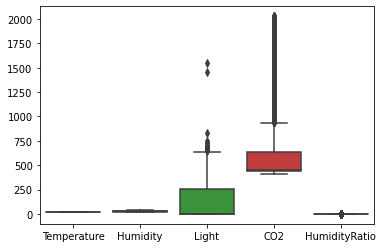

In [4]:
sns.boxplot(data = occ[['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']])

<AxesSubplot:>

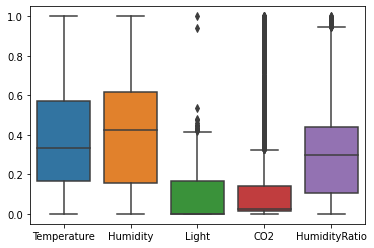

In [5]:
scaler = preprocessing.MinMaxScaler()
occ[['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']] = scaler.fit_transform(occ[['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']].values.astype(float))
sns.boxplot(data=occ[['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']])

### 5.Выполните замену категориальных признаков

In [6]:
occ['date'].describe()

count                    8143
unique                   8143
top       2015-02-04 17:51:00
freq                        1
Name: date, dtype: object

### 6.Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других

<AxesSubplot:>

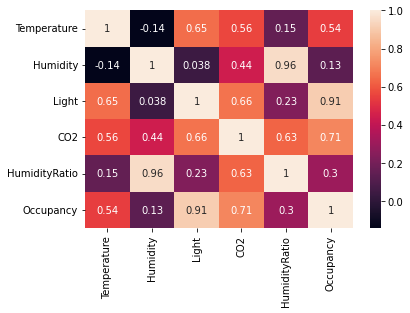

In [7]:
Corrocc = occ.corr()
sns.heatmap(Corrocc, annot = True)

### 7.Заполните пропущенные значения в данных

In [8]:
nullocc = occ.isnull()
nullocc.sum()

date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

### 8.Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку. Оцените качество работы классификатора. 

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score
X = occ.drop(('date'), axis=1)
Y = occ.Occupancy
X.columns

Index(['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio',
       'Occupancy'],
      dtype='object')

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)

#####  Линейный классификатор (персептрон)

In [18]:
ppn = Perceptron(max_iter=500, eta0 =1, penalty='l2', random_state = 1)
ppn.fit(x_train, y_train)
ppn_predict = ppn.predict(x_test)
print('Оценка точности: %.5f' % accuracy_score(y_test, ppn_predict))

Оценка точности: 1.00000


######  Метод GridSearchCV

In [19]:
ppn1 = {'max_iter': range(500,2000,50), 'penalty': ('l2', 'l1', 'elasticnet')}
ppn2 = GridSearchCV(ppn, ppn1, cv=5, n_jobs=-1, verbose=True)
ppn2.fit(x_train, y_train)
print('Лучший набор:', ppn2.best_params_)
print('Лучшая точность:', ppn2.best_score_)
print('Значение точности: %.5f' % accuracy_score(y_test, ppn_predict))

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Лучший набор: {'max_iter': 500, 'penalty': 'l1'}
Лучшая точность: 1.0
Значение точности: 1.00000


######  Перекрестный метод

In [20]:
all_accuracies = cross_val_score(estimator=ppn, X=x_train, y=y_train, cv=5)
print('Точность для cv=5:', all_accuracies)
print('Среднее значение точности:', all_accuracies.mean())

Точность для cv=5: [1.         0.99385965 1.         1.         1.        ]
Среднее значение точности: 0.9987719298245615


##### Логический классификатор (бинарное решающее дерево)

In [21]:
tree = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, max_features = 5, random_state = 1)
tree.fit(x_train, y_train)
y_pred = tree.predict(x_test)
print('Оценка точности: %.5f' % accuracy_score(y_test, y_pred))

Оценка точности: 1.00000


###### Метод GridSearchCV

In [22]:
tree1 = {'max_depth': range(1,11), 'max_features': range(4,19), 'criterion': ('gini', 'entropy')}
tree2 = GridSearchCV(tree, tree1, cv=5, n_jobs=-1, verbose=True)
tree2.fit(x_train, y_train)
print('Лучший набор:', tree2.best_params_)
print('Лучшая точность:', tree2.best_score_)
print('Значение точности: %.5f' % accuracy_score(y_test, y_pred))

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
Лучший набор: {'criterion': 'gini', 'max_depth': 1, 'max_features': 6}
Лучшая точность: 1.0
Значение точности: 1.00000


###### Перекрестный метод

In [23]:
all_accuracies = cross_val_score(estimator=tree, X=x_train, y=y_train, cv=5)
print('Точность для cv=5:', all_accuracies)
print('Среднее значение точности:', all_accuracies.mean())

Точность для cv=5: [0.99912281 1.         1.         1.         1.        ]
Среднее значение точности: 0.9998245614035088
